Aikasarjojen esittäminen Pythonilla.

Latasin ensin Alma Median päätöskurssien aikasarjat viimeisen kahden vuoden ajalta ja HEX25 indeksin arvot viimeisen kahden vuoden ajalta.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Avataan tiedostot, lisätään aikaleimat ja järjestetään aikajärjestykseen.

In [2]:
# Avataan tiedostot
alma = pd.read_csv('http://myy.haaga-helia.fi/~a1604511/Rahoituksen-Excel/ALMA.csv', sep = ';', decimal = ',', usecols = [0,1,2,3,4,5,6,7,8,9,10])
markkinat = pd.read_csv('http://myy.haaga-helia.fi/~a1604511/Rahoituksen-Excel/INDEKSIT.csv', sep = ';', decimal = ',', usecols = [0,1,2,3])

# Lisätään aikaleimat
alma.index = pd.to_datetime(alma['Date'], dayfirst = True)
markkinat.index = pd.to_datetime(markkinat['Date'], dayfirst = True)

# Järjestetään vanhimmasta uusimpaan
alma.sort_index(inplace = True)
markkinat.sort_index(inplace=True)

In [3]:
# Ensimmäiset rivit
alma.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2017-05-03,3.5.2017,5.53,5.59,5.59,5.61,5.49,5.58,5.555,18591,103280.42,81
2017-05-04,4.5.2017,5.50,5.58,5.56,5.60,5.49,5.58,5.547,21980,121601.05,54
2017-05-05,5.5.2017,5.54,5.60,5.58,5.60,5.54,5.60,5.577,15742,87789.30,47
2017-05-08,8.5.2017,5.65,5.66,5.58,5.66,5.57,5.66,5.623,17113,96226.07,78
2017-05-09,9.5.2017,5.64,5.68,5.66,5.68,5.64,5.68,5.660,16913,95718.86,55


In [4]:
# Ensimmäiset rivit
markkinat.head()

,Date,High price,Low price,Closing price
Date,,,,
2017-04-04,4.4.2017,3797.99,3773.39,3789.10
2017-04-05,5.4.2017,3799.23,3761.62,3761.72
2017-04-06,6.4.2017,3780.17,3729.63,3779.97
2017-04-07,7.4.2017,3787.30,3757.34,3786.83
2017-04-10,10.4.2017,3797.77,3781.13,3797.77


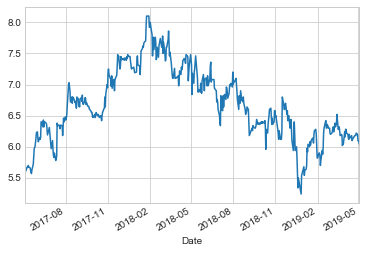

In [5]:
# Piirretään Alma Median viivakuvio
alma['Closing price'].plot()

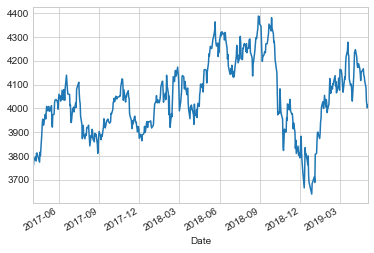

In [6]:
# Piiretään indeksien viivakuvio
markkinat['Closing price'].plot()

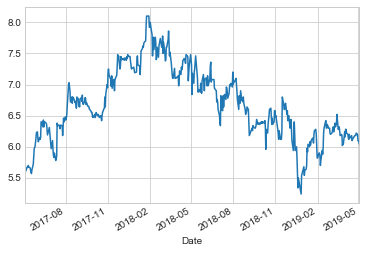

In [7]:
# Muutetaan ajankohtaa
alma['Closing price']['2017-01-01':].plot()

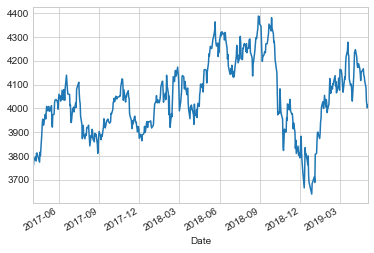

In [8]:
# Muuttaa ajankohtaa
markkinat['Closing price']['2017-01-01':].plot()

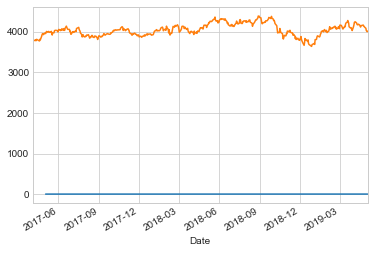

In [9]:
alma['Closing price']['2017-01-01':].plot()
markkinat['Closing price']['2017-01-01':].plot()

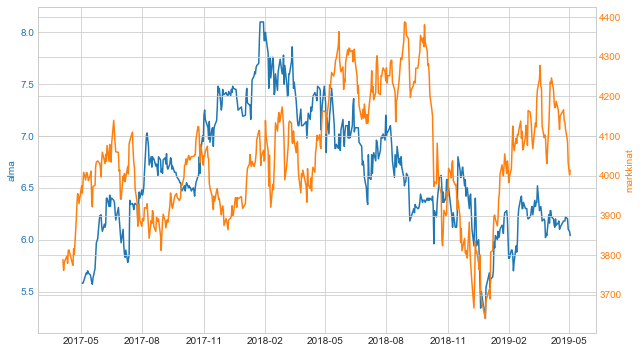

In [13]:
# luodaan figure- ja axes-oliot.
fig1, ax1 = plt.subplots(figsize = (10,6))
                
# Määritetään ax1-olio:
color = 'C0'
ax1.set_ylabel('alma', color=color)
ax1.plot(alma['Closing price'], color=color)
ax1.tick_params(axis='y',labelcolor=color)

# Luodaan toinen axes-olio, jolla on yhteinen x-akseli ax1-olion kanssa:
ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('markkinat', color=color)
ax2.plot(markkinat['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

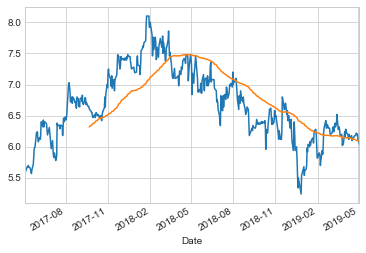

In [14]:
# Piirretään samaan kuvaan kuvio päätöskursseista ja niiden 100:n havainnon liukuvasta keskiarvosta
alma['Closing price'].plot()
alma['Closing price'].rolling(100).mean().plot()

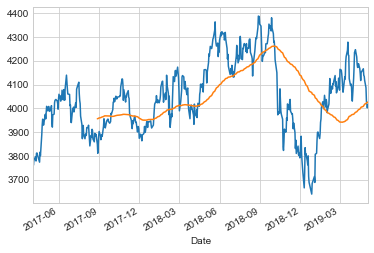

In [15]:
markkinat['Closing price'].plot()
markkinat['Closing price'].rolling(100).mean().plot()

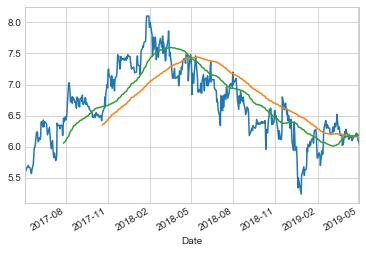

In [16]:
alma['Closing price'].plot()
alma['Closing price'].rolling(120).mean().plot()
alma['Closing price'].rolling(60).mean().plot()

In [20]:
alma['Alma_change'] = alma['Closing price'].pct_change()
markkinat['Markkinat_change'] = markkinat['Closing price'].pct_change()

In [21]:
muutokset = pd.concat([alma['Alma_change'], markkinat['Markkinat_change']], axis=1)
muutokset.head()

,Alma_change,Markkinat_change
Date,,
2017-04-04,NaN,NaN
2017-04-05,NaN,-0.007226
2017-04-06,NaN,0.004852
2017-04-07,NaN,0.001815
2017-04-10,NaN,0.002889


In [22]:
# Lasketaan, miten muutosprosentit korreloivat:
muutokset.corr()

,Alma_change,Markkinat_change
Alma_change,1.000000,0.285238
Markkinat_change,0.285238,1.000000


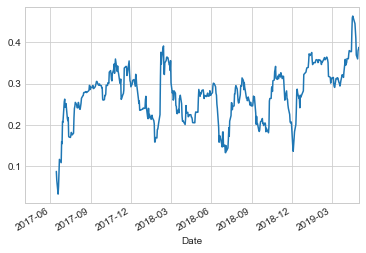

In [23]:
# Liukuva korrelaatio kertoo, miten Valmetin ja Markkinoiden muutosprosentti korreloivat eri aikoina:

korrelaatio=muutokset['Alma_change'].rolling(90,min_periods=30).corr(muutokset['Markkinat_change'])
korrelaatio['2017-03-01':].plot()

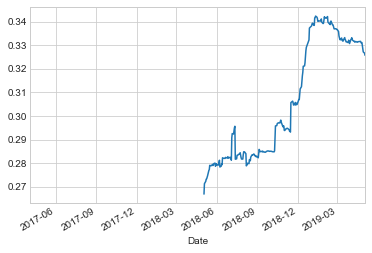

In [26]:
# Lasketaan ja piirretään Alma Median osakkeen volatiliteetti:

(muutokset['Alma_change'].rolling(252).std()*(252**0.5))['2017-03-01':].plot()